In [98]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from numpy import nan,inf
import scipy.constants as sc
import matplotlib as mpl
import glob
from astropy.time import Time
plt.rc('font',**{'family':'serif','serif':['Times']})
mpl.rcParams['font.size'] = 13
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['patch.linewidth'] = 1

# Changing this will affect the size of the plot in Jupyter notebook as well as resolution of the final PDF. Can change later
plt.rcParams['figure.dpi'] = 100

#mpl.rcParams['mathtext.fontset'] = 'custom'
#mpl.rcParams['mathtext.rm'] = 'Serif'
#mpl.rcParams['mathtext.it'] = 'Serif:italic'
#mpl.rcParams['mathtext.bf'] = 'Serif:bold'

# tick parameters:
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True


mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
    
mpl.rcParams['xtick.major.size'] = 6  # default 3.5
mpl.rcParams['ytick.major.size'] = 6  # default 3.5
mpl.rcParams['xtick.minor.size'] =  3  # default 2 
mpl.rcParams['ytick.minor.size'] = 3  # default 2 
    
mpl.rcParams['xtick.major.width'] = 1  # default 0.8
mpl.rcParams['ytick.major.width'] = 1  # default 0.8
mpl.rcParams['xtick.minor.width'] =1  # default 0.6
mpl.rcParams['ytick.minor.width'] = 1  # default 0.6
mpl.rcParams['text.usetex'] = True


MASS_TO_FREQ = sc.eV / sc.h
def plot_timescales( ax,ymin,ymax,annotate=True):

    l10ma_T = np.log10( 1/(1.0*sc.day*1 * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 day",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")
    
    # l10ma_T = np.log10( 1/(1.0*sc.day*14 * MASS_TO_FREQ) )
    # ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    # if annotate==True:
    #     ax.annotate(r"2 weeks",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(1.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 year",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(11.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T ,l10ma_T ],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"Solar Cycle",xy = [l10ma_T ,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(18.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    if annotate==True:
        ax.annotate(r"T$_{\rm obs}$",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")


#rho = 7.68351e-6 * 0.40 #0.46
rho = (0.4 * 1e9 * 100**3) * sc.c**3  * sc.hbar**3 / sc.eV**3
l10S_to_l10ga = lambda l10S,l10ma: l10S+9+l10ma-np.log10(rho)/2


def make_ul_plot(l10ma , ul_auto,ul_full):
    fig , ax = plt.subplots(figsize=(5,4))
    #ax.set_title("95% UL (Bayesian approach)")
    #ax.fill_between(np.log10(PPTA_QUIJOTE[:,0]),np.log10(PPTA_QUIJOTE[:,1]),np.zeros(len(PPTA_QUIJOTE)),alpha=0.5,fc='darkgreen',label="PPTA-QUIJOTE")


    _l10ma = np.linspace(-24,-18.5,101)
    #Chandra
    ax.plot(_l10ma,np.log10(5e-13)*np.ones(len(_l10ma)),color="black",ls='--')
    ax.annotate("Chandra\n H1821+643",xy=(-18.5-0.05,np.log10(5e-13)-0.1),size=12,va="top",ha="right")

    #Planck
    ax.plot(_l10ma,_l10ma+9,color="black",ls=':',lw=2)
    ax.annotate("Planck",xy=(-19.3,-10.5),size=14,va="top",ha="right",rotation="25")



    ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'.',color='blue')
    ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'-',color='blue',label="Full-corr")


    ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'.',color='red')
    ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'-',color='red',label="Auto-corr")



    ax.set_xlim(-23.5,-18.5)
    ymin = -16
    ymax = -6
    ax.set_ylim(ymin,ymax)
    #plt.title(r"the 95% upper limit on $\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$"+
    #          "\n assuming local DM density " + r"$0.40 {\rm GeV}/{\rm cm}^3$")

    ax.legend(loc=4,prop={'size': 8})

    plot_timescales( ax,ymin,ymax,annotate=True)


    #ax.plot(mock[:,0] , l10S_to_l10ga(mock[:,2],mock[:,0]),'red' )

    #plot_timescales(ax,ymin,ymax)

    plt.xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    plt.ylabel(r"$\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$")
    plt.grid(axis="y")


def make_bf_plot(l10ma,lbf):

    fig , ax = plt.subplots(figsize=(5,3))
    ymin = -4
    ymax = 10
    plot_timescales( ax,ymin,ymax,annotate=True)
    plt.plot(l10ma,lbf,'-',color='r')
    plt.plot(l10ma,lbf,'.',color='r')
    plt.ylim(ymin,ymax)
    plt.xlim(-23.5,-18.5)
    plt.plot([-23.5,-18.5],[0,0],lw=2,color="black")


    plt.xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    plt.ylabel(r"$\ln $BF$^{\rm full}_{\rm auto}$")
    plt.grid(axis="y")

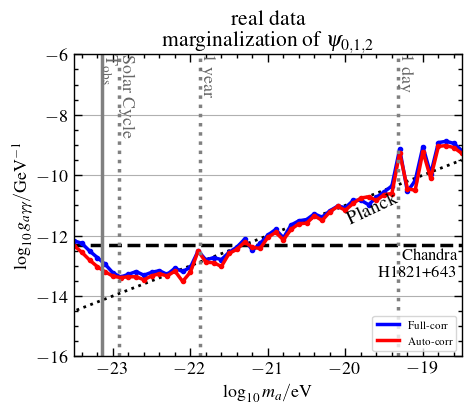

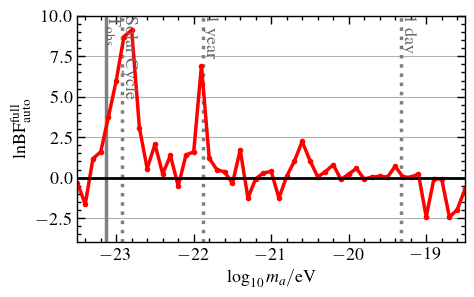

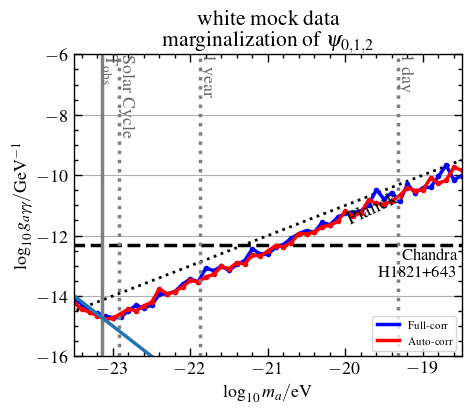

In [101]:
# True


l10ma = np.arange(5,56)*0.1 -24
ul_auto = np.array([-0.59 , -0.913, -1.27 , -1.589, -1.859, -2.101, -2.249, -2.321,
       -2.421, -2.62 , -2.592, -2.619, -2.795, -2.732, -3.177, -2.967,
       -2.364, -2.841, -2.954, -3.181, -2.845, -2.814, -2.671, -2.948,
       -3.084, -2.815, -2.752, -3.098, -2.849, -2.764, -2.846, -2.703,
       -2.956, -2.772, -2.694, -2.918, -2.792, -2.713, -2.772, -2.993,
       -2.901, -2.964, -1.711, -3.005, -3.157, -1.977, -2.952, -2.002,
       -2.078, -2.245, -2.533])

ul_full = np.array([ -0.428, -0.617, -0.969, -1.287, -1.608,
       -1.991, -2.23 , -2.24 , -2.249, -2.47 , -2.473, -2.52 , -2.743,
       -2.64 , -2.846, -2.807, -2.364, -2.765, -2.786, -2.952, -2.81 ,
       -2.742, -2.573, -3.047, -2.919, -2.739, -2.655, -3.032, -2.705,
       -2.668, -2.725, -2.638, -2.85 , -2.734, -2.682, -2.832, -2.694,
       -2.786, -3.038, -2.889, -2.809, -2.713, -1.594, -3.097, -2.841,
       -1.816, -2.818, -1.877, -1.936, -2.105, -2.441])

make_ul_plot(l10ma,ul_auto,ul_full)
plt.title("real data\n"+r"marginalization of $\psi_{0,1,2}$")
plt.savefig("ul_1.jpg",bbox_inches='tight')

lbf = np.array([  -inf,   -inf,  1.171,  3.42 ,  4.634,  5.362,    inf,    inf,
        2.749,  0.55 ,  2.144,  0.233,  1.37 , -0.524,  1.399,  1.594,
        6.921,  1.196,  0.489,  0.352, -0.357,  1.713, -1.255, -0.072,
        0.293,  0.381, -1.262,  0.086,  1.027,  2.241,  1.056,  0.048,
        0.369,  0.801, -0.114,  0.217,  0.569, -0.093,  0.036,  0.084,
        0.032,  0.702,  0.041,  0.019,  0.228, -2.422, -0.058, -0.093,
       -2.445, -1.976, -0.723])

idx = np.array([8,9,10,11,12,13,15])-5
lbf[idx] = np.array([-1.404,  0.759,  2.994,  5.077,  5.695,  0.062, -0.933])+3
idx = np.array([10,11,12])-5
lbf[idx] = np.array([-1.012,  1.716,  2.117])+7
lbf[1] = -1.653
lbf[0] = -0.330
make_bf_plot(l10ma,lbf)


# Mock
l10ma = np.arange(5,56)*0.1 -24
ul_auto = np.array([-2.476, -2.803, -2.992, -3.209, -3.433, -3.493, -3.443, -3.388,
       -3.549, -3.487, -3.462, -3.118, -3.391, -3.412, -3.347, -3.244,
       -3.386, -3.331, -3.34 , -3.179, -3.361, -3.25 , -3.396, -3.191,
       -3.332, -3.273, -3.19 , -3.327, -3.288, -3.09 , -3.205, -3.248,
       -3.165, -3.215, -3.188, -2.948, -3.21 , -3.199, -2.881, -3.094,
       -3.225, -3.211, -3.133, -2.973, -3.167, -3.239, -2.95 , -3.224,
       -3.23 , -2.897, -3.095])

ul_full = np.array([-2.392, -2.608, -2.972, -3.127, -3.324, -3.473, -3.569, -3.442,
       -3.365, -3.562, -3.547, -3.304, -3.388, -3.41 , -3.268, -3.188,
       -3.394, -3.028, -3.22 , -3.176, -3.411, -3.306, -3.288, -2.995,
       -3.271, -3.373, -3.247, -3.256, -3.148, -3.094, -3.089, -3.252,
       -3.019, -3.2  , -3.053, -3.019, -3.096, -3.147, -3.033, -2.637,
       -3.057, -2.931, -3.327, -2.862, -3.241, -3.18 , -3.255, -2.996,
       -2.73 , -3.316, -3.268])

make_ul_plot(l10ma,ul_auto,ul_full)

plt.plot(l10ma , -14-2*(l10ma+23.5))

plt.title("white mock data\n"+r"marginalization of $\psi_{0,1,2}$")
plt.savefig("ul_1_white.jpg",bbox_inches='tight')

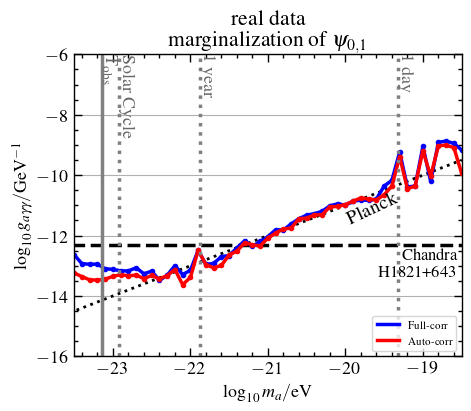

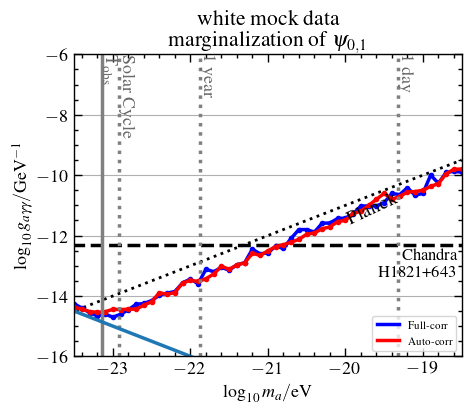

In [5]:



l10ma = np.arange(5,56)*0.1 -24
ul_auto = np.array([-1.495, -1.716, -1.922, -2.031, -2.102, -2.106, -2.151, -2.289,
       -2.366, -2.583, -2.579, -2.788, -2.786, -2.681, -3.282, -3.144,
       -2.343, -2.917, -3.127, -3.143, -2.899, -2.872, -2.692, -2.862,
       -2.998, -2.84 , -2.775, -2.737, -2.809, -2.598, -2.682, -2.673,
       -2.766, -2.603, -2.692, -2.73 , -2.715, -2.71 , -2.849, -2.975,
       -2.904, -2.717, -1.842, -3.006, -3.016, -1.946, -2.888, -1.981,
       -2.066, -2.244, -3.2  ])

ul_full = np.array([-0.895, -1.286, -1.407, -1.503, -1.756, -1.875, -2.026, -2.126,
       -2.124, -2.421, -2.436, -2.84 , -2.773, -2.552, -2.947, -2.91 ,
       -2.348, -2.913, -2.979, -2.852, -2.92 , -2.765, -2.627, -2.912,
       -2.851, -2.793, -2.665, -2.771, -2.672, -2.598, -2.581, -2.63 ,
       -2.653, -2.57 , -2.606, -2.751, -2.721, -2.779, -2.893, -2.947,
       -2.617, -2.527, -1.692, -2.949, -3.016, -1.805, -3.059, -1.867,
       -1.929, -2.105, -2.426])


make_ul_plot(l10ma,ul_auto,ul_full)
plt.title("real data\n"+r"marginalization of $\psi_{0,1}$")
plt.savefig("ul_2.jpg",bbox_inches='tight')



# Mock
l10ma = np.arange(5,56)*0.1 -24
ul_auto = np.array([-2.637, -2.786, -2.974, -3.097, -3.178, -3.198, -3.309, -3.393,
       -3.495, -3.461, -3.445, -3.249, -3.403, -3.442, -3.225, -3.238,
       -3.377, -3.388, -3.329, -3.171, -3.375, -3.33 , -3.359, -3.145,
       -3.312, -3.263, -3.223, -3.259, -3.278, -3.278, -3.216, -3.272,
       -3.229, -3.271, -3.193, -3.253, -3.126, -3.145, -3.06 , -2.956,
       -2.862, -3.153, -3.163, -3.114, -3.199, -3.255, -3.227, -3.235,
       -3.007, -2.963, -3.054])

ul_full = np.array([-2.519, -2.757, -3.01 , -3.216, -3.26 , -3.459, -3.461, -3.41 ,
       -3.335, -3.405, -3.409, -3.331, -3.362, -3.409, -3.219, -3.199,
       -3.45 , -3.072, -3.254, -3.212, -3.402, -3.322, -3.357, -3.007,
       -3.265, -3.328, -3.208, -3.383, -3.147, -2.958, -3.059, -3.243,
       -3.047, -3.142, -3.091, -3.179, -3.138, -2.982, -3.073, -3.177,
       -3.167, -2.961, -3.102, -2.974, -3.325, -3.356, -2.856, -3.225,
       -2.965, -3.031, -3.156])

make_ul_plot(l10ma,ul_auto,ul_full)
plt.plot(l10ma , -14-1*(l10ma+23.5)-0.5)


plt.title("white mock data\n"+r"marginalization of $\psi_{0,1}$")
plt.savefig("ul_2_white.jpg",bbox_inches='tight')


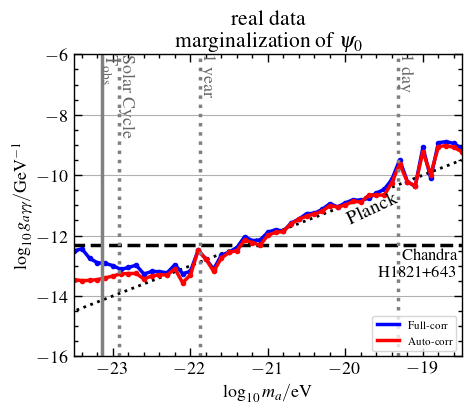

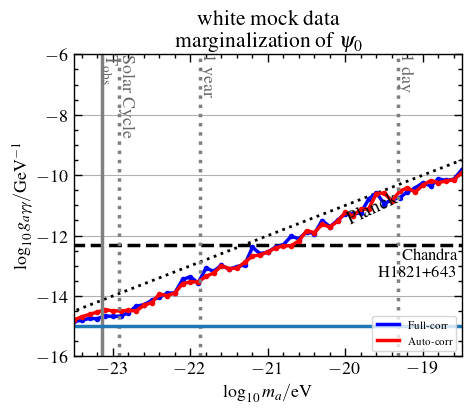

In [7]:



l10ma = np.arange(5,56)*0.1 -24
ul_auto = np.array([-1.717, -1.847, -1.942, -2.014, -2.056, -2.098, -2.122, -2.213,
       -2.311, -2.597, -2.594, -2.654, -2.762, -2.659, -3.218, -3.059,
       -2.346, -2.735, -3.246, -2.9  , -2.816, -2.855, -2.603, -2.789,
       -2.974, -2.742, -2.751, -2.82 , -2.662, -2.614, -2.612, -2.642,
       -2.65 , -2.563, -2.714, -2.743, -2.723, -2.845, -2.726, -2.808,
       -2.921, -2.603, -2.086, -2.786, -3.007, -1.98 , -2.838, -2.009,
       -2.078, -2.238, -2.477])

ul_full = np.array([-0.759, -0.795, -1.212, -1.457, -1.579, -1.752, -1.975, -2.014,
       -2.036, -2.431, -2.445, -2.552, -2.688, -2.522, -2.917, -2.944,
       -2.341, -2.735, -3.17 , -2.803, -2.804, -2.753, -2.494, -2.725,
       -2.802, -2.643, -2.664, -2.81 , -2.642, -2.612, -2.53 , -2.622,
       -2.59 , -2.5  , -2.708, -2.673, -2.671, -2.792, -2.82 , -2.748,
       -2.73 , -2.495, -1.951, -2.769, -3.03 , -1.836, -2.951, -1.883,
       -1.946, -2.108, -2.368])


make_ul_plot(l10ma,ul_auto,ul_full)
plt.title("real data\n"+r"marginalization of $\psi_{0}$")
plt.savefig("ul_3.jpg",bbox_inches='tight')

#make_bf_plot(l10ma,np.log(bf))


# Mock
l10ma = np.arange(5,56)*0.1 -24
ul_auto = np.array([-3.044, -3.047, -3.064, -3.09 , -3.106, -3.253, -3.35 , -3.435,
       -3.548, -3.469, -3.475, -3.298, -3.447, -3.457, -3.248, -3.288,
       -3.395, -3.31 , -3.294, -3.16 , -3.352, -3.433, -3.348, -3.236,
       -3.297, -3.298, -3.262, -3.3  , -3.389, -3.33 , -3.094, -3.26 ,
       -3.086, -3.273, -3.18 , -2.989, -3.2  , -3.087, -3.175, -2.764,
       -2.851, -3.209, -2.993, -2.975, -3.217, -3.084, -3.041, -3.201,
       -3.251, -3.306, -3.183])

ul_full = np.array([-3.098, -3.164, -3.196, -3.31 , -3.315, -3.436, -3.524, -3.506,
       -3.397, -3.445, -3.405, -3.39 , -3.372, -3.449, -3.11 , -3.121,
       -3.429, -3.034, -3.238, -3.137, -3.373, -3.384, -3.433, -2.945,
       -3.256, -3.3  , -3.235, -3.26 , -3.082, -3.259, -3.14 , -3.29 ,
       -2.958, -3.265, -3.15 , -3.028, -3.144, -3.2  , -2.851, -2.739,
       -3.203, -3.167, -3.204, -3.107, -3.082, -3.009, -3.214, -3.083,
       -3.232, -3.295, -3.08 ])

make_ul_plot(l10ma,ul_auto,ul_full)
plt.plot(l10ma , -14-0*(l10ma+23.5)-1)

plt.title("white mock data\n"+r"marginalization of $\psi_{0}$")
plt.savefig("ul_3_white.jpg",bbox_inches='tight')



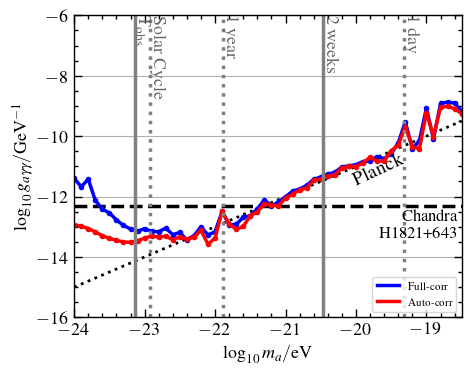

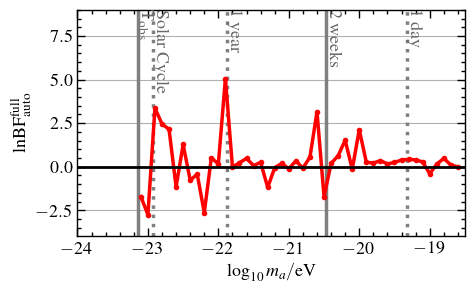

In [3]:



l10ma = np.arange(0,56)*0.1 -24
ul_auto = np.array([-0.687, -0.834, -1.016, -1.226, -1.456, -1.639, -1.806, -1.961,
       -2.07 , -2.122, -2.132, -2.165, -2.295, -2.367, -2.587, -2.587,
       -2.777, -2.794, -2.676, -3.237, -3.127, -2.344, -2.875, -3.137,
       -3.146, -2.89 , -2.861, -2.697, -2.844, -2.966, -2.803, -2.782,
       -2.734, -2.772, -2.62 , -2.673, -2.685, -2.735, -2.612, -2.661,
       -2.763, -2.737, -2.657, -2.894, -2.973, -2.744, -2.65 , -2.137,
       -2.912, -3.068, -1.977, -2.868, -1.998, -2.069, -2.245, -2.514])


ul_full = np.array([  0.846,  0.469,  0.619, -0.182, -0.575, -0.794, -1.133, -1.411,
       -1.631, -1.804, -1.819, -2.013, -2.119, -2.101, -2.417, -2.446,
       -2.799, -2.754, -2.558, -2.928, -2.921, -2.349, -2.892, -2.976,
       -2.845, -2.892, -2.763, -2.566, -2.873, -2.836, -2.765, -2.68 ,
       -2.709, -2.689, -2.587, -2.609, -2.612, -2.655, -2.575, -2.641,
       -2.7  , -2.697, -2.773, -2.731, -2.902, -2.841, -2.575, -1.986,
       -2.969, -2.811, -1.83 , -2.956, -1.87 , -1.932, -2.062, -2.431])


make_ul_plot(l10ma,ul_auto,ul_full)
plt.savefig("ul.pdf",bbox_inches='tight')
#PPTA_QUIJOTE = np.genfromtxt("Parfile/PPTA-QUIJOTE.txt")


l10ma = np.arange(9,55)*0.1 -24

lbf = np.array([-1.72 , -2.758,  3.36 ,  2.446,  2.146, -1.156,  1.273, -0.778,
       -0.434, -2.639,  0.504,  0.162,  5.051, -0.021,  0.223,  0.473,
        0.059,  0.249, -1.195, -0.061,  0.188, -0.117,  0.331, -0.084,
        0.552,  3.148, -1.731,  0.183,  0.627,  1.519, -0.15 ,  2.116,
        0.257,  0.206,  0.348,  0.162,  0.24 ,  0.383,  0.423,  0.385,
        0.274, -0.403,  0.143,  0.477,  0.09 , -0.009])

make_bf_plot(l10ma,lbf)
plt.savefig("bf.pdf",bbox_inches='tight')


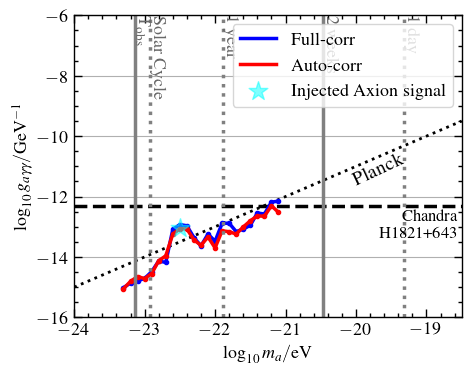

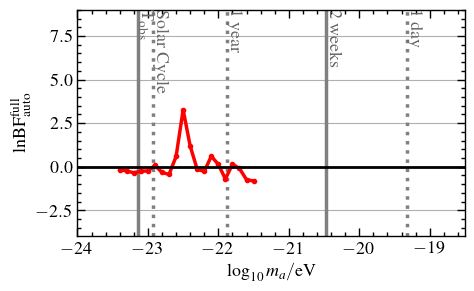

In [8]:
l10ma = np.arange(0,56)*0.1 -24
l10ma = l10ma[7:30]
ul_auto = np.array([-3.715, -3.725, -3.647, -3.744, -3.639, -3.675, -3.477, -3.509,
       -3.365, -3.305, -3.472, -3.408, -3.081, -3.019, -2.397, -2.322,
       -2.43 , -2.89 , -3.17 , -2.994, -3.456, -2.989, -3.121, -3.297,
       -3.164, -3.06 , -2.997, -3.108, -2.86 , -3.181, -3.129, -3.1  ,
       -2.946, -2.923, -2.849, -3.029, -2.916, -2.729, -3.045, -3.23 ,
       -3.152, -3.203, -3.155, -3.272, -2.99 , -2.998, -2.931, -2.448,
       -2.915, -3.082, -3.21 , -3.081, -2.978, -2.935, -3.114, -2.752])
ul_auto = ul_auto[7:30]

ul_full = np.array([-4.429, -3.463, -2.069, -3.369, -3.02 , -5.37 , -6.571, -3.472,
       -3.421, -3.446, -3.469, -3.343, -3.091, -3.237, -2.245, -2.183,
       -2.324, -2.814, -3.191, -2.896, -3.236, -2.741, -2.84 , -3.217,
       -3.234, -3.209, -2.899, -3.035, -2.739, -2.809, -2.536, -2.683,
       -2.79 , -2.828, -2.622, -2.944, -2.969, -3.01 , -2.43 , -2.471,
       -2.879, -3.208, -2.956, -3.089, -2.691, -3.176, -3.13 , -2.33 ,
       -2.978, -2.597, -3.24 , -2.667, -2.935, -3.203, -3.039, -3.172])
ul_full = ul_full[7:30]


make_ul_plot(l10ma,ul_auto,ul_full)
plt.scatter(-22.5,l10S_to_l10ga(-2.3,-22.5),s=200,marker="*",color="cyan",zorder=4,alpha=0.5,label="Injected Axion signal")
plt.legend()


l10ma = -24.00 + np.arange(6,26)*0.1
lbf = [-0.1688208695750521, -0.2497105786989314, -0.3508066955703004, -0.26104686519913717, -0.2446918875204126, 0.06959329179919539, -0.3298399352280354, -0.4455238686601693, 0.5837746234121585, 3.2685314153140625, 1.1814999484738775, -0.1585732078723831, -0.2667886248635035, 0.5999819379959375, 0.12489327383888797, -0.7047080029610214, 0.137852298094139, -0.10444266336759751, -0.7527941896286593, -0.8167611365271221]
make_bf_plot(l10ma,lbf)

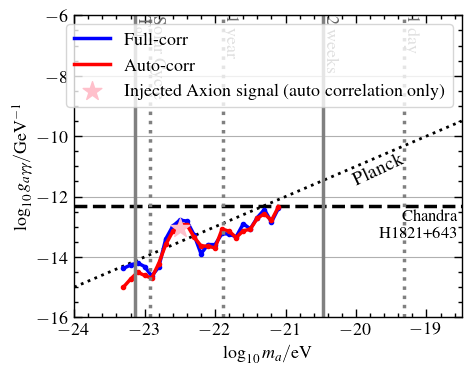

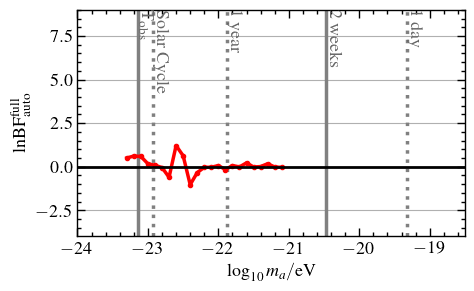

In [6]:

l10ma = -24.00 + np.arange(7,30)*0.1
ul_auto = np.array([-3.453, -3.292, -3.163, -3.368, -3.558, -3.175, -2.643, -2.31 ,
       -2.179, -2.287, -2.791, -3.189, -3.3  , -3.457, -2.931, -3.106,
       -3.414, -3.291, -3.336, -3.074, -3.027, -3.347, -2.994])

ul_full = np.array([-2.833, -2.823, -2.853, -3.073, -3.486, -3.297, -2.46 , -2.135,
       -2.037, -2.169, -2.715, -3.448, -3.247, -3.348, -3.077, -3.204,
       -3.389, -3.057, -3.326, -3.05 , -2.888, -3.403, -3.043])

lbf = np.array([ 0.497,  0.61 ,  0.585,  0.166,  0.077, -0.049, -0.611,  1.208,
        0.628, -1.033, -0.342, -0.038, -0.033,  0.063, -0.166,  0.065,
       -0.015,  0.22 , -0.022,  0.006,  0.169, -0.021, -0.038])


make_ul_plot(l10ma,ul_auto,ul_full)
plt.scatter(-22.5,l10S_to_l10ga(-2.3,-22.5),s=200,marker="*",color="pink",zorder=4,alpha=1,label="Injected Axion signal (auto correlation only)")
plt.legend()


make_bf_plot(l10ma,lbf)

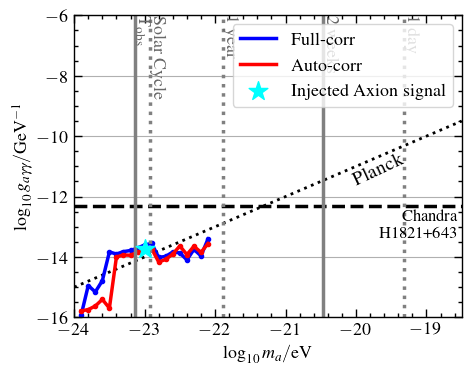

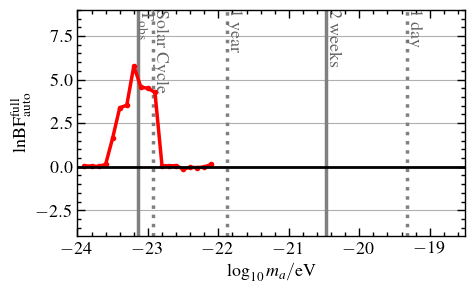

In [9]:

l10ma = -24.00 + np.arange(1,20)*0.1
ul_auto = np.array([-3.644, -3.699, -3.681, -3.563, -3.95 , -2.356, -2.39 , -2.5  ,
       -2.503, -2.525, -2.586, -3.123, -3.138, -3.059, -2.894, -3.278,
       -3.104, -3.402, -3.216])

ul_full = np.array([-3.775, -2.902, -3.216, -2.942, -2.091, -2.259, -2.28 , -2.342,
       -2.363, -2.357, -2.41 , -2.972, -3.038, -2.991, -3.123, -3.454,
       -3.207, -3.521, -3.059])

lbf = np.array([ 0.04 ,  0.036,  0.012,  0.132,  1.651,  3.381,  3.526,  5.779,
        4.567,  4.498,  4.26 ,  0.056,  0.048,  0.059, -0.134, -0.041,
       -0.055, -0.017,  0.129])


make_ul_plot(l10ma,ul_auto,ul_full)
plt.scatter(-23,l10S_to_l10ga(-2.5,-23),s=200,marker="*",color="cyan",zorder=4,alpha=1,label="Injected Axion signal")
plt.legend()


make_bf_plot(l10ma,lbf)

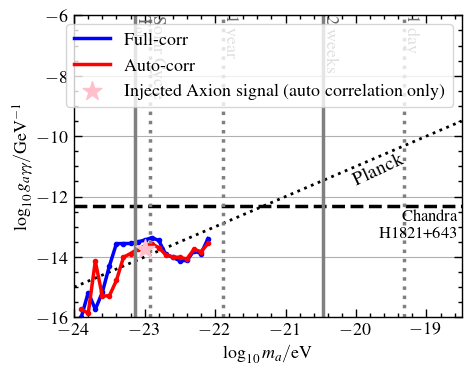

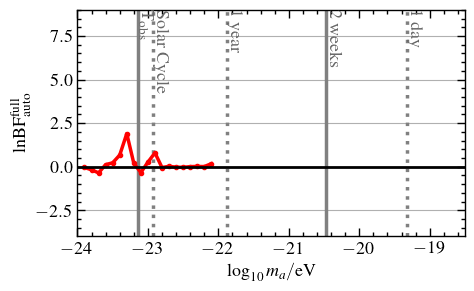

In [10]:

l10ma = -24.00 + np.arange(1,20)*0.1
ul_auto = np.array([-3.596, -3.814, -2.196, -3.449, -3.542, -3.133, -2.465, -2.443,
       -2.398, -2.401, -2.421, -2.646, -2.983, -3.157, -3.271, -3.423,
       -3.203, -3.382, -3.21 ])

ul_full = np.array([-3.861, -3.134, -3.791, -3.329, -2.553, -1.916, -2.012, -2.11 ,
       -2.159, -2.199, -2.218, -2.408, -2.971, -3.17 , -3.382, -3.473,
       -3.254, -3.445, -3.05 ])

lbf = np.array([-4.572e-02, -1.837e-01, -3.565e-01,  1.168e-01,  2.207e-01,
        6.665e-01,  1.895e+00,  1.904e-01, -3.369e-01,  2.570e-01,
        7.936e-01, -5.020e-02,  2.153e-02, -2.898e-02, -3.803e-02,
        1.201e-03,  1.377e-02,  3.922e-03,  1.698e-01])


make_ul_plot(l10ma,ul_auto,ul_full)
plt.scatter(-23,l10S_to_l10ga(-2.5,-23),s=200,marker="*",color="pink",zorder=4,alpha=1,label="Injected Axion signal (auto correlation only)")
plt.legend()


make_bf_plot(l10ma,lbf)

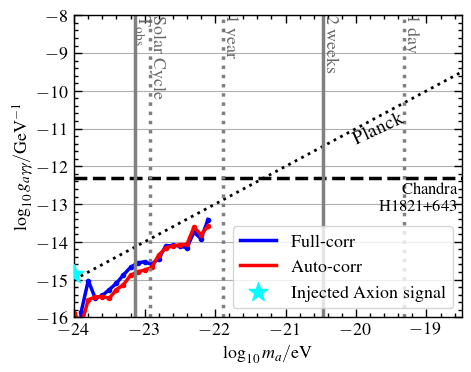

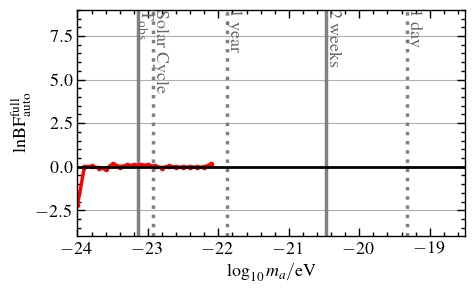

In [19]:

l10ma = -24.00 + np.arange(0,20)*0.1
ul_auto = np.array([-3.636, -4.058, -3.494, -3.514, -3.605, -3.748, -3.624, -3.588,
       -3.443, -3.451, -3.504, -3.532, -3.308, -3.221, -3.265, -3.333,
       -3.426, -3.067, -3.366, -3.239])

ul_full = np.array([-6.53 , -3.71 , -2.981, -3.553, -3.577, -3.519, -3.453, -3.33 ,
       -3.232, -3.214, -3.283, -3.451, -3.398, -3.166, -3.252, -3.364,
       -3.516, -3.195, -3.474, -3.065])


lbf = np.array([-2.197,  0.   ,  0.015, -0.061, -0.15 ,  0.154,  0.005,  0.067,
        0.086,  0.082,  0.1  ,  0.012, -0.053,  0.018, -0.025, -0.029,
       -0.017, -0.031, -0.026,  0.151])


make_ul_plot(l10ma,ul_auto,ul_full)
plt.scatter(-24,l10S_to_l10ga(-2.6,-24),s=200,marker="*",color="cyan",zorder=4,alpha=1,label="Injected Axion signal")
plt.legend()

make_bf_plot(l10ma,lbf)

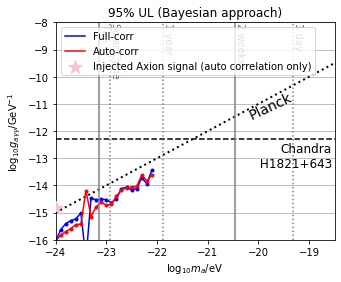

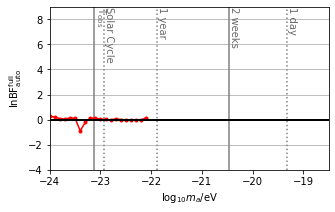

In [14]:

l10ma = -24.00 + np.arange(0,20)*0.1
ul_auto = np.array([-3.805, -3.69 , -3.655, -3.645, -3.598, -3.677, -2.551, -3.6  ,
       -3.342, -3.273, -3.485, -3.553, -3.35 , -3.222, -3.248, -3.315,
       -3.393, -3.071, -3.389, -3.277])

ul_full = np.array([-3.826, -3.485, -3.366, -3.347, -3.389, -3.266, -5.057, -2.925,
       -3.083, -3.167, -3.276, -3.49 , -3.45 , -3.169, -3.228, -3.415,
       -3.474, -3.174, -3.488, -3.094])

lbf = np.array([ 0.268,  0.201,  0.084,  0.048,  0.128,  0.11 , -0.895, -0.221,
        0.135,  0.102,  0.054,  0.016, -0.022,  0.063,  0.008, -0.039,
       -0.021, -0.052, -0.043,  0.16 ])


make_ul_plot(l10ma,ul_auto,ul_full)
plt.scatter(-24,l10S_to_l10ga(-2.6,-24),s=200,marker="*",color="pink",zorder=4,alpha=1,label="Injected Axion signal (auto correlation only)")
plt.legend()

make_bf_plot(l10ma,lbf)

In [ ]:
"""
import glob
import numpy as np
def getbf(burn = 0 , printit=True , folder="./"):
   files = sorted(glob.glob(folder+'*/chain_1.txt'))[::-1] + sorted(glob.glob(folder+"*/chain_1.0.txt"))[::-1]\
      + sorted(glob.glob(folder+'*/*/chain_1.txt'))[::-1] + sorted(glob.glob(folder+"*/*/chain_1.0.txt"))[::-1]
   res = []
   ys = []
   #l10ma = []
   np.set_printoptions(precision=3)
   for file in files:
      try:
         chain = np.loadtxt(file,skiprows=burn)
         chain0 = chain[chain[:,0]<0]
         chain1 = chain[chain[:,0]>=0]

         if len(chain1) ==0 :             
            ul1 = np.repeat(np.nan,5)
         else:
            ul1 = np.percentile(chain1[:,-5],[5,32,50,68,95])

         if len(chain0) ==0 :
            ul0 = np.repeat(np.nan,5)
         else:
            ul0 = np.percentile(chain0[:,-5],[5,32,50,68,95])

         try:
            bestfit = chain1[np.argmax(chain1[:,-4]),[-7,-6,-5]]
         except:
            bestfit=""

         try:
            dlnpos = chain1[0,-3]
         except:
            dlnpos = np.nan

         y = len(chain1)/len(chain)
         ys.append(y)
         res.append([ul0.tolist(),ul1.tolist()])
         if printit == True:
            print(file.split("/")[:-1],"|",np.histogram(chain[:,0],bins=[-1,0,1])[0],
            "|%.2f"%(ul0[-1]),"%.2f"%(ul1[-1]),"|%.2f"%(y/(1-y+1e-9)),"|%.2f"%dlnpos,bestfit)
         #l10ma.append(float(file.split("/")[0].split("_")[-1]))

      except:
         if printit==True:
            print(file.split("/")[:-1],"|")
   ys = np.array(ys)
   bf = ys/(1-ys);bf = bf.tolist()
   return res,bf

res,bf = getbf(burn=000,printit=True)
np.percentile(bf,99)
"""


(-3.5, 1.5)

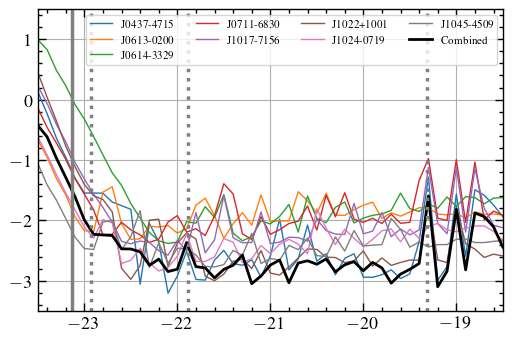

In [94]:
_res0 = np.array([[-1.056, -1.411, -1.664, -1.969, -2.278, -2.465, -2.481, -2.027,
        -1.997, -2.486, -2.268, -1.838, -2.78 , -2.367, -2.71 , -2.46 ,
        -2.471, -2.572, -2.76 , -2.77 , -2.731, -2.496, -2.577, -2.214,
        -2.712, -2.63 , -2.657, -2.413, -2.484, -2.292, -2.583, -2.597,
        -2.274, -2.508, -2.167, -2.423, -2.409, -2.401, -1.965, -2.148,
        -2.442, -2.356, -2.439, -2.399, -2.4  , -2.312, -2.307, -2.366,
        -2.366, -2.346, -2.332],
       [-0.616, -0.916, -1.243, -1.543, -1.826, -2.107, -2.293, -1.986,
        -2.04 , -2.713, -2.659, -2.46 , -2.706, -2.837, -2.779, -2.594,
        -2.217, -2.676, -2.679, -2.603, -2.299, -2.36 , -2.697, -2.632,
        -2.415, -2.55 , -2.392, -2.312, -2.393, -2.551, -1.808, -2.129,
        -2.4  , -2.145, -2.293, -2.434, -2.313, -2.171, -2.141, -2.355,
        -2.143, -2.295, -2.097, -2.049, -2.157, -2.186, -2.129, -2.092,
        -2.091, -2.182, -2.332],
       [ 0.449,  0.038, -0.353, -0.767, -1.11 , -1.403, -1.592, -1.653,
        -1.858, -2.792, -2.975, -2.746, -1.996, -1.978, -2.762, -2.377,
        -2.205, -2.308, -2.923, -2.998, -2.888, -2.677, -2.637, -2.796,
        -2.5  , -2.871, -2.904, -2.772, -2.62 , -2.471, -2.48 , -2.608,
        -2.614, -2.699, -2.669, -2.503, -2.756, -2.62 , -2.744, -2.695,
        -2.655, -2.658, -1.703, -2.653, -2.698, -1.769, -2.383, -2.475,
        -2.613, -2.558, -2.588],
       [ 0.228, -0.064, -0.41 , -0.698, -1.037, -1.314, -1.564, -1.785,
        -2.028, -2.345, -2.386, -2.341, -2.366, -2.501, -2.574, -2.33 ,
        -2.502, -1.871, -2.537, -2.322, -1.589, -2.286, -2.37 , -2.364,
        -1.859, -2.381, -2.358, -2.278, -2.284, -2.341, -1.981, -2.168,
        -2.226, -2.232, -1.719, -2.221, -2.177, -1.87 , -2.269, -2.142,
        -2.239, -2.157, -1.124, -2.051, -2.22 , -1.12 , -2.193, -1.144,
        -1.799, -2.08 , -2.12 ],
       [-0.138, -0.46 , -0.718, -0.988, -1.309, -1.564, -1.826, -2.236,
        -2.228, -2.03 , -2.155, -2.239, -2.363, -2.311, -2.026, -1.92 ,
        -2.193, -2.137, -2.251, -1.924, -1.392, -1.562, -2.222, -2.313,
        -1.939, -2.229, -2.153, -2.051, -2.013, -1.761, -2.159, -1.583,
        -1.94 , -1.541, -1.978, -2.033, -1.963, -2.051, -1.897, -2.047,
        -2.031, -1.337, -0.976, -1.963, -1.999, -0.992, -2.032, -1.034,
        -1.992, -1.846, -1.914],
       [ 0.991,  0.828,  0.484,  0.232, -0.081, -0.322, -0.611, -0.914,
        -1.211, -1.419, -1.722, -1.961, -2.201, -2.337, -2.381, -2.357,
        -2.021, -2.045, -1.773, -1.951, -1.572, -2.21 , -2.336, -2.269,
        -2.007, -2.058, -1.932, -1.735, -2.191, -1.595, -1.966, -2.037,
        -1.783, -1.694, -2.041, -1.961, -1.915, -1.892, -1.832, -1.548,
        -1.804, -1.852, -1.727, -1.798, -1.611, -1.77 , -1.606, -1.622,
        -1.725, -1.63 , -1.622],
       [-0.669, -0.954, -1.307, -1.575, -1.94 , -2.169, -2.186, -1.531,
        -1.443, -2.051, -2.313, -2.305, -2.092, -2.11 , -2.083, -2.209,
        -2.14 , -1.748, -1.631, -1.921, -2.296, -2.054, -1.872, -2.079,
        -1.577, -2.016, -2.007, -2.008, -1.525, -1.675, -1.881, -1.549,
        -1.912, -1.917, -1.822, -1.748, -1.697, -1.967, -1.874, -1.929,
        -1.86 , -1.789, -1.789, -1.894, -1.907, -1.888, -1.958, -1.857,
        -1.899, -1.893, -1.911],
       [ 0.13 , -0.234, -0.637, -0.953, -1.3  , -1.546, -1.546, -1.549,
        -1.696, -1.754, -1.816, -3.055, -2.051, -2.351, -3.203, -2.92 ,
        -2.511, -2.976, -2.988, -2.656, -2.496, -2.715, -2.742, -2.65 ,
        -2.939, -2.59 , -1.977, -2.821, -2.636, -2.076, -2.676, -2.553,
        -2.899, -2.626, -2.552, -2.939, -2.941, -2.898, -2.817, -2.962,
        -2.884, -2.351, -1.283, -2.99 , -2.764, -1.562, -2.591, -1.491,
        -1.584, -1.745, -1.938]])

PSRNS = ['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1125-6014', 'J1545-4550', 'J1600-3053', 'J1603-7202', 'J1643-1224', 'J1713+0747', 'J1730-2304', 'J1744-1134', 'J1824-2452', 'J1857+0943', 'J1909-3744', 'J1939+2134', 'J2145-0750', 'J2241-5236']

fig,ax = plt.subplots(figsize=(6,4))

res0 = _res0[::-1,:]
l10ma = np.arange(5,56)*0.1 -24
for i in range(len(res0)):
    ax.plot(l10ma,res0[i],label=PSRNS[i],lw=1)



ul_full = np.array([ -0.428, -0.617, -0.969, -1.287, -1.608,
       -1.991, -2.23 , -2.24 , -2.249, -2.47 , -2.473, -2.52 , -2.743,
       -2.64 , -2.846, -2.807, -2.364, -2.765, -2.786, -2.952, -2.81 ,
       -2.742, -2.573, -3.047, -2.919, -2.739, -2.655, -3.032, -2.705,
       -2.668, -2.725, -2.638, -2.85 , -2.734, -2.682, -2.832, -2.694,
       -2.786, -3.038, -2.889, -2.809, -2.713, -1.594, -3.097, -2.841,
       -1.816, -2.818, -1.877, -1.936, -2.105, -2.441])
ax.plot(l10ma,ul_full,label="Combined",lw=2,color='k',ls="-")
ax.legend(ncol=4,fontsize=8)
ax.grid()
ax.set_xlim(-23.5,-18.5)
ymin = -3.5
ymax = 1.5
plot_timescales(ax,ymin,ymax,annotate=False)
plt.ylim(ymin,ymax)

In [96]:
0.52/ np.exp(1)

0.19129730940915002